Analysis of US Youtube Trending Videos and Engagement


Project Overview

This study seeks to establish the pattens in terms of audience content engagement and characteristics of trending videos on YouTube in the US. The aim is to use USvideos (https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv) form kaggle.com to find insights like factors influencing video popularity and trends, content type, viewers engagement and timing strategy. The dataset contains features such as trending videos, categories, viewers engagement metrics such as comments, likes and dislikes, tags and more. There are over forty thousand entries in the dataset.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US. This dataset is a daily record of the top trending YouTube videos.

**Overview**

The analysis (EDA), explores trending youtube videos in the US. It seeks to estabish pattern and trends in engagement activities and content types.

The goal is to answer the forllowing questions:

1. What type of content trend most often?

2. Which content categories receive the most engagement?

3. What is th most active time on Youtube (Trending videos by time-hour, and by day of the week)?

4. What is the average trending duration of videos (days)?

5. Which category of videos has the highest like-to-dislike ratio?

6.  How many tags do trending videos usually have?

7. What is the average length of a trending video's, title and description?

8. Are there seasonality patterns or seasonal trend is videos?

9. Do videos with clickbait words have better performance in terms of views. likes and comments?

First we install necessary libraries

In [2]:
!pip install pandas
!pip install matplotlib

We import the libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



1. **Wrangling and**
Preparing the Data for Analysis

The next step is to oad the dataset into pandas dataframe

In [4]:
#Loading the data into pandas dataframe
df = pd.read_csv('/content/USvideos.csv')

1. Data Overview

Viewing the dimensions of the dataframe

In [5]:
df.shape

(40949, 16)

The shape of the datframe is made up of 40,949 rows and 16 columns

Viewing the names of columns in the dataset

In [6]:
#Display the names of the columns
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/defau

The descriptive statistics of the numerical columns

This step, is to explore the dataframe's description of the numerical columns to get the summary statistics, by use of df.describe method.

In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


The mean number of views for trending videos 236,078,500 and the maximum of above 225millions while the median number of views is 681,861, indicating skewness in the distribution od views.

Some videos had a huge number of likes up to 5.6millions, however, majory had likes below 55 thousands. The number of dislikes is significantly low.

Most of the videos have moderate comments,with the median of 1800, but some videos receive millions comments of up to 1.3 millions.


In [9]:
#check datatype
df.dtypes

,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,object
tags,object
views,int64
likes,int64
dislikes,int64


In [8]:
#Display the first 5 rows
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


The first five rows of the datset are as shown in the table above

 2. **Data Wrangling**

Loading the JSON file with categories for mapping onto category id.

In [9]:
import json

#Load the JSON file
with open('/content/CA_category_id.json', 'r') as f:
    category_data = json.load(f)

Mapping categories - This is to ensure the category features are readable.
We now create a mapping dictionary

In [10]:
#We buid a dictionary as, {category_id: category_name}
category_mapping = {}
for item in category_data['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']

We then Map the Category Names into our Dataframe, for readability since we assume category IDs alone cannot give comprehensive impression.

In [11]:
df['category_name'] = df['category_id'].map(category_mapping)


Now we have a clear column of Category name in the dataframe as shown below.

In [12]:
df[['category_id', 'category_name']].drop_duplicates().sort_values('category_id')


,category_id,category_name
8,1,Film & Animation
30,2,Autos & Vehicles
12,10,Music
14,15,Pets & Animals
10,17,Sports
34,19,Travel & Events
131,20,Gaming
0,22,People & Blogs
2,23,Comedy
1,24,Entertainment


We check for missing values

In [13]:
#checking missing values
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


about 570 missing values in description
and 57 missing values  of category names.

We clean up the missing rows to remove incompleteness in the dataset for reliable analysis.


In [14]:
#drop missing values
df.dropna(inplace=True)

Deal with duplicates by dropping them.

Our assumption is that there are multiple entries.

To prevate inflating of aggregates we drop them.

In [15]:
df.duplicated().sum()  # check
df = df.drop_duplicates()


We convert date and time columns into proper format
We use super .loc to assign values in place.

In [21]:
df.loc[:, 'publish_time'] = pd.to_datetime(df['publish_time'])
df.loc[:, 'trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')


Cleaning up the tags

In [17]:
df.loc[:, 'tags'] = df['tags'].apply(lambda x: x.replace("|", ","))


Create a copy of the dataframe

In [18]:
df = df[df['views'] > 1000].copy()


We the need to extract time features

In [22]:
#publish day
df['publish_day'] = df['publish_time'].dt.date

#publish hour
df['publish_hour'] = df['publish_time'].dt.hour

#publish day of the week
df['publish_weekday'] = df['publish_time'].dt.day_name()

#Trending days
df['trending_day'] = df['trending_date'].dt.date

We drop thumbnail column to ease our dataframe

In [23]:
df.drop(['thumbnail_link', 'video_id'], axis=1, inplace=True)


We normalize the engagement metrics

In [24]:
df['likes_to_views'] = df['likes'] / df['views']
df['comments_to_views'] = df['comment_count'] / df['views']


In [25]:
#Check data frame columns again
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category_name', 'publish_day', 'publish_hour',
       'publish_weekday', 'trending_day', 'likes_to_views',
       'comments_to_views'],
      dtype='object')

Dislike Ratio

In [26]:
df['dislikes_to_views'] = df['dislikes'] / df['views']


Like to dislike Ratio

In [27]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # add 1 to avoid division by zero


Engagement Score

In [28]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # add 1 to avoid division by zero


Number of tags


In [29]:
df['tag_count'] = df['tags'].apply(lambda x: 0 if x == '[none]' else len(x.split('|')))


Video length and description length

In [30]:
#Video lenght
df['title_length'] = df['title'].apply(len)

#description length
df['description_length'] = df['description'].fillna('').apply(len)



In [31]:
#Check colums agin
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category_name', 'publish_day', 'publish_hour',
       'publish_weekday', 'trending_day', 'likes_to_views',
       'comments_to_views', 'dislikes_to_views', 'like_dislike_ratio',
       'tag_count', 'title_length', 'description_length'],
      dtype='object')

In [32]:
#check the index
df.index

#first 5 rows
df.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,publish_hour,publish_weekday,trending_day,likes_to_views,comments_to_views,dislikes_to_views,like_dislike_ratio,tag_count,title_length,description_length
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,...,17,Monday,2017-11-14,0.076869,0.021318,0.003963,19.388945,1,34,1410
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency,""last week ...",2418783,97185,6146,12703,...,7,Monday,2017-11-14,0.040179,0.005252,0.002541,15.810151,1,62,630
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman,""rudy"",""mancuso"",""king"",""bach""...",3191434,146033,5339,8181,...,19,Sunday,2017-11-14,0.045758,0.002563,0.001673,27.347004,1,53,1177
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link,""gmm"",""good mythical morning"",""...",343168,10172,666,2146,...,11,Monday,2017-11-14,0.029641,0.006253,0.001941,15.250375,1,32,1403
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan,""higa"",""higatv"",""nigahiga"",""i dare you"",""...",2095731,132235,1989,17518,...,18,Sunday,2017-11-14,0.063097,0.008359,0.000949,66.449749,1,24,636


In [33]:
df.to_csv("cleaned_youtube_data.csv", index=False)


We again check for missing values

In [34]:
#Any missing values on important columns
df.isna().sum().sort_values(ascending=False)


,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0
comment_count,0


We Inspect the outliers

In [35]:
#check for outliers on important columns
df[['views', 'likes', 'dislikes', 'comment_count']].describe()


,views,likes,dislikes,comment_count
count,4.025400e+04,4.025400e+04,4.025400e+04,4.025400e+04
mean,2.371247e+06,7.439922e+04,3.432820e+03,8.185826e+03
std,7.434323e+06,2.286342e+05,2.245416e+04,3.335199e+04
min,1.028000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.480698e+05,5.648250e+03,2.060000e+02,6.260000e+02
50%,6.906970e+05,1.840750e+04,6.380000e+02,1.878500e+03
75%,1.835115e+06,5.568850e+04,1.948750e+03,5.790750e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


Checking for time alignment

In [38]:
#To confirm that all the publish time come before the trending date, we can use the following code:
(df['publish_time'].dt.date > df['trending_date']).sum()


np.int64(0)

0 Time gaps.

In [50]:
#we can now doenload the cleaned data
df.to_csv("cleaned_youtube_data.csv", index=False)

In [51]:
from google.colab import files
files.download("cleaned_youtube_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Exploratory Data Analysis**


In this section, we will uncover insights by answerin the proposed question by question

1. What types of content trend most often?

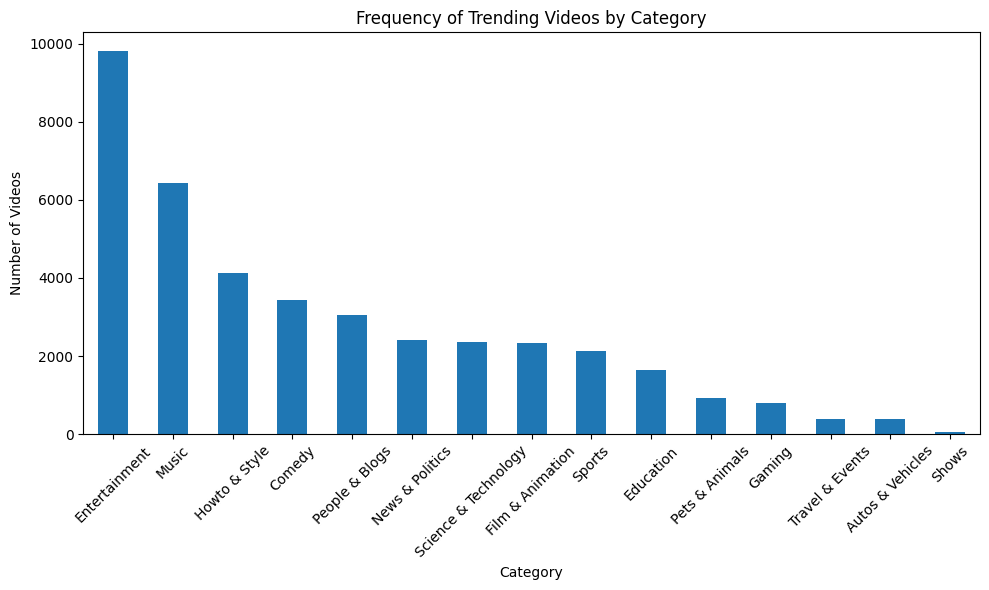

In [39]:
#The type of content that trend oftenly the most
df['category_name'].value_counts().plot(kind='bar', figsize=(10,6), title='Frequency of Trending Videos by Category')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Entertainment and music categories were the top trended categories.

2. Which categories receive the most engagement?

Likes

Comments

Dislikes

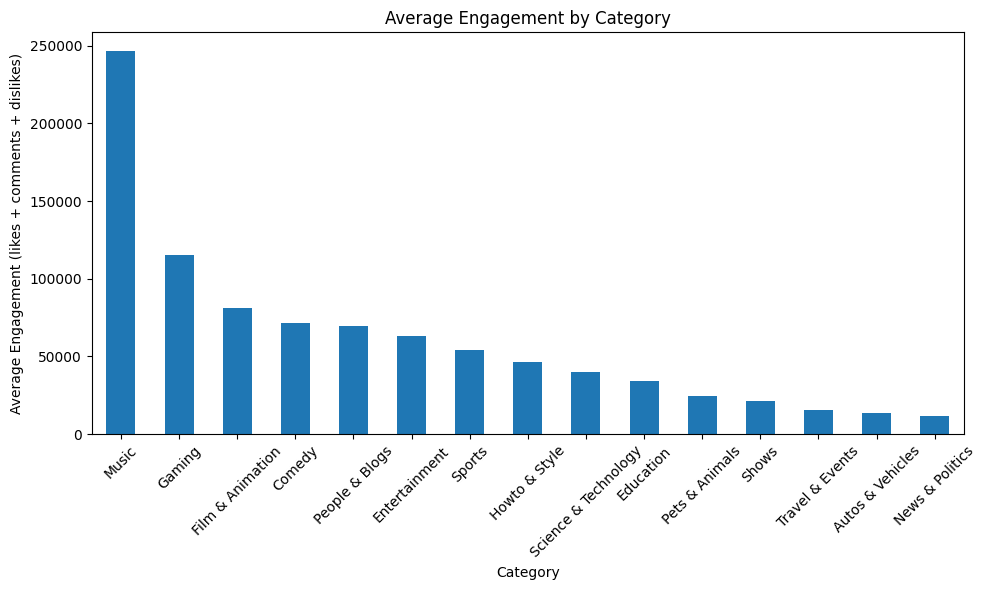

In [40]:
#The type of category that receive the most engagement
engagement_df = df.groupby('category_name')[['likes', 'dislikes', 'comment_count']].mean()
engagement_df['total_engagement'] = engagement_df.sum(axis=1)
engagement_df.sort_values('total_engagement', ascending=False)['total_engagement'].plot(kind='bar', figsize=(10,6), title='Average Engagement by Category')
plt.xlabel('Category')
plt.ylabel('Average Engagement (likes + comments + dislikes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Music, gaming and entertainment such asfilms and comedy dominate the trending list.

3. What is the most active time for YouTube?

Publish hour

Publish week day

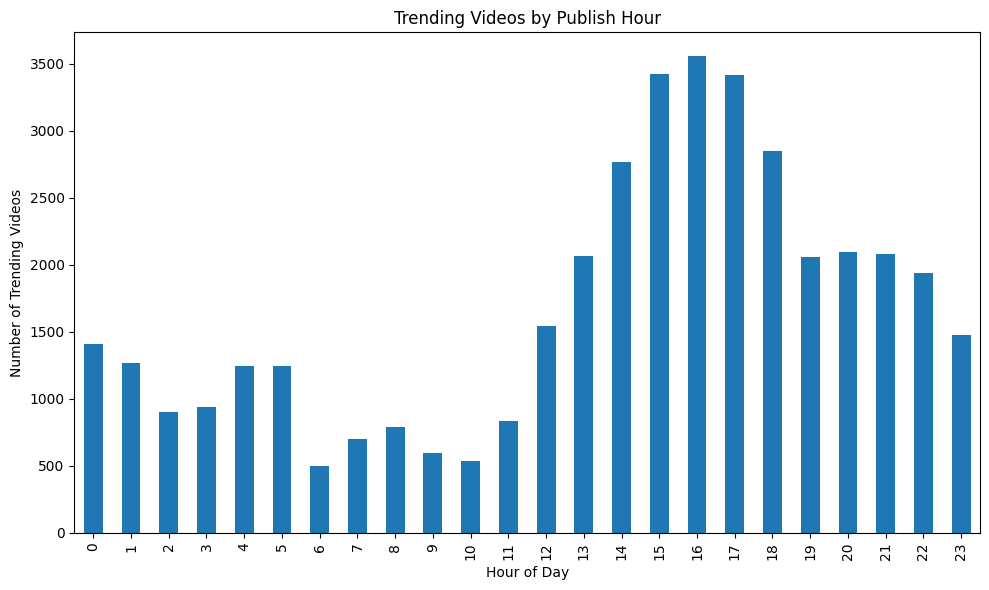

In [41]:
#Publish hour
df['publish_hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,6), title='Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trending Videos')
plt.tight_layout()
plt.show()


Most active hours for trending videos are in the afternoona and evenings.

Publish Day

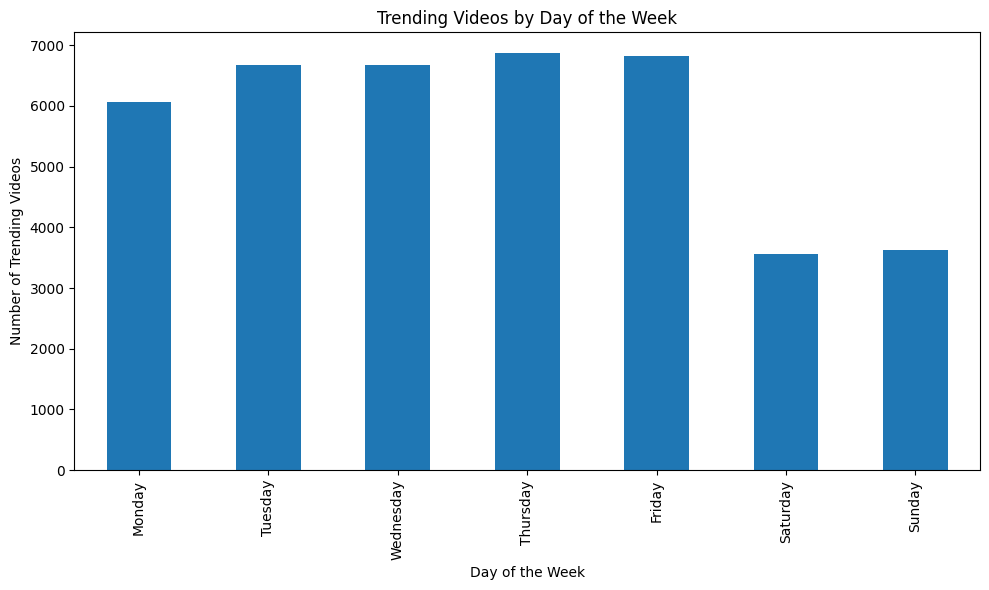

In [42]:
#Publish Day
df['publish_weekday'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar', figsize=(10,6), title='Trending Videos by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.tight_layout()
plt.show()


Thursdays and fridays are the most active days

4. What is the average trending duration of a video

In [ ]:
# Average trending duration (in days)
avg_trending_duration = df['trending_days'].mean()
print(f"Average Trending Duration: {avg_trending_duration:.2f} days")


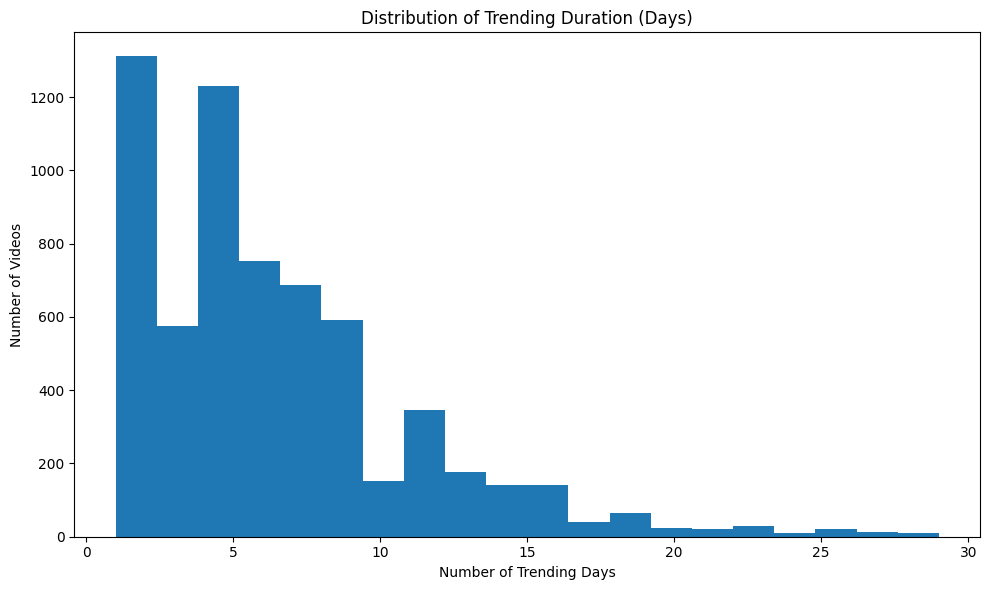

In [43]:
#We find number of unique days video trended
trending_counts = df.groupby('title')['trending_date'].nunique()
trending_counts.describe()

#Plot
trending_counts.plot(kind='hist', bins=20, title='Distribution of Trending Duration (Days)', figsize=(10,6))
plt.xlabel('Number of Trending Days')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()


In [44]:
#We find number of unique days video trended
trending_counts = df.groupby('title')['trending_date'].nunique()
trending_counts.describe()

,trending_date
count,6335.000000
mean,6.353907
std,4.631930
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,29.000000


5. Which category of videos has the highest like-to-dislike ratio

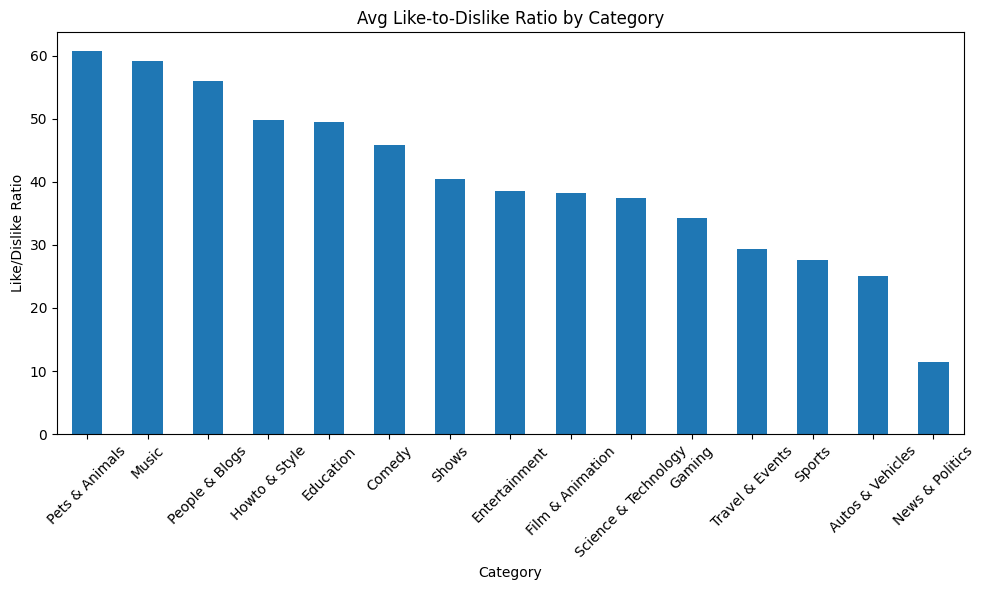

In [45]:
# Plot Category with the highest like to dislike ratio
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # avoid division by zero
df.groupby('category_name')['like_dislike_ratio'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Avg Like-to-Dislike Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Like/Dislike Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pets and animals, music, people and blogs categories have higher average likes-to-dislike ratios.

6. Normally, how many tags do trending videos have?

We also examined the average number of tags per video as shown in the graph below.



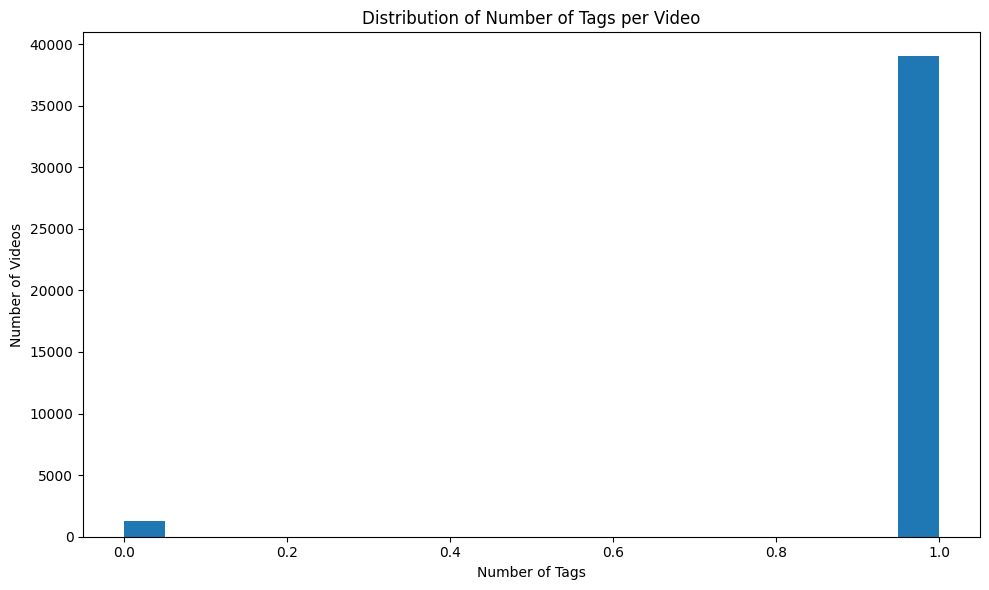

,tag_count
count,40254.000000
mean,0.968898
std,0.173597
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [46]:
#Tags by trending videos
df['tag_count'].plot(kind='hist', bins=20, figsize=(10,6), title='Distribution of Number of Tags per Video')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

df['tag_count'].describe()


Generally, every trending video has one tag as shown in the graph and descriptive statistics results.


Basend on the bar plot and numerical range, the average number of tags per trending video is 1, same as maximum and minimu.

7. What is the average length of a trending video's, title and description?


Average Title Length: 48.67901326576241
Average Description Length: 1046.599766482834


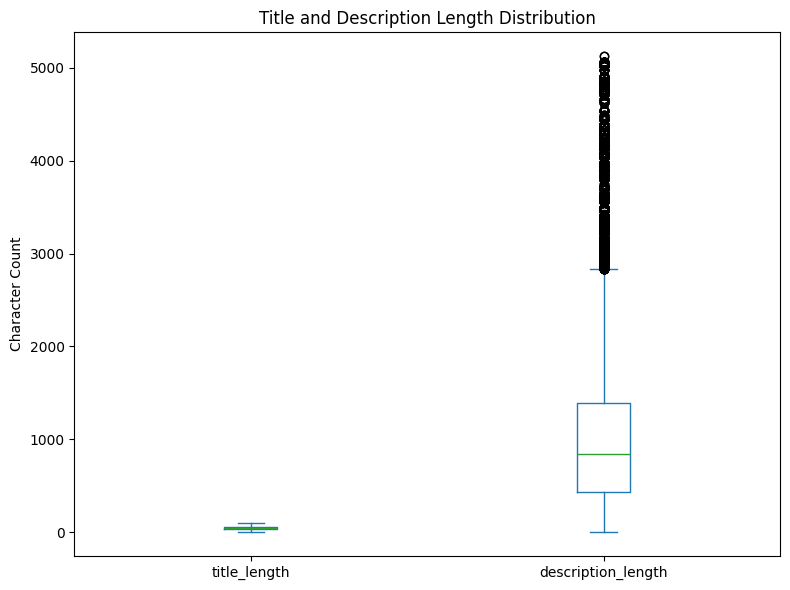

In [47]:
#The average length of title and description of the trending video
print("Average Title Length:", df['title_length'].mean())
print("Average Description Length:", df['description_length'].mean())

# Optional visual
df[['title_length', 'description_length']].plot(kind='box', title='Title and Description Length Distribution', figsize=(8,6))
plt.ylabel('Character Count')
plt.tight_layout()
plt.show()


The average title lenght of trending video is 48.67 while the average .

The average description length is 1046

8. Can we identify seasonal or monthly trends in videos?

We are seeking to uncover seasonalty

/tmp/ipython-input-3572601663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trending_month', data=df, palette='coolwarm')


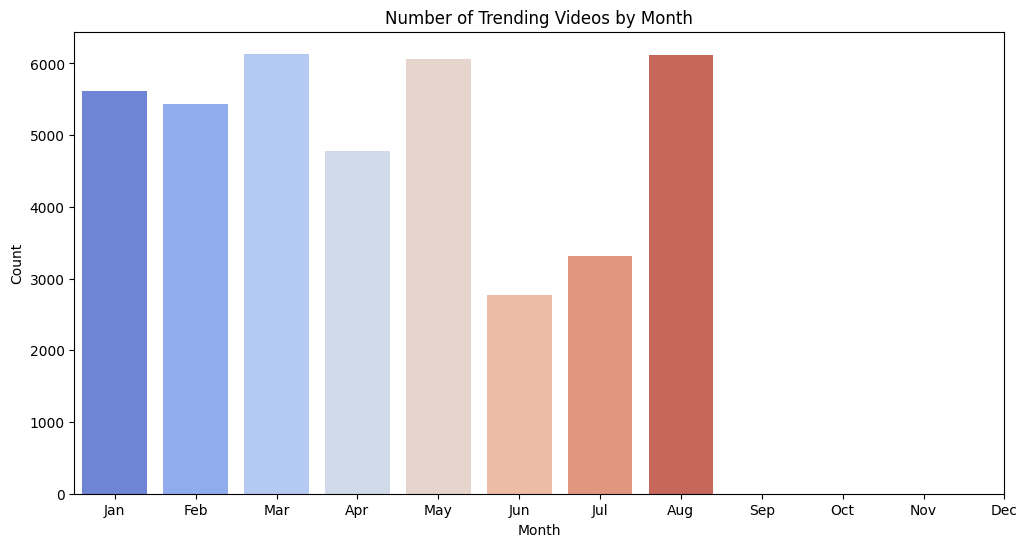

In [48]:
# 1. Convert trending_date to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Extract month and year
df['trending_month'] = df['trending_date'].dt.month
df['trending_year'] = df['trending_date'].dt.year

# Plot count of trending videos by month
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='trending_month', data=df, palette='coolwarm')
plt.title('Number of Trending Videos by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Mrch, May and August are shown as the highest trending months.

9. Do  videos with clickbait words have better performance in terms of views. likes and comments?

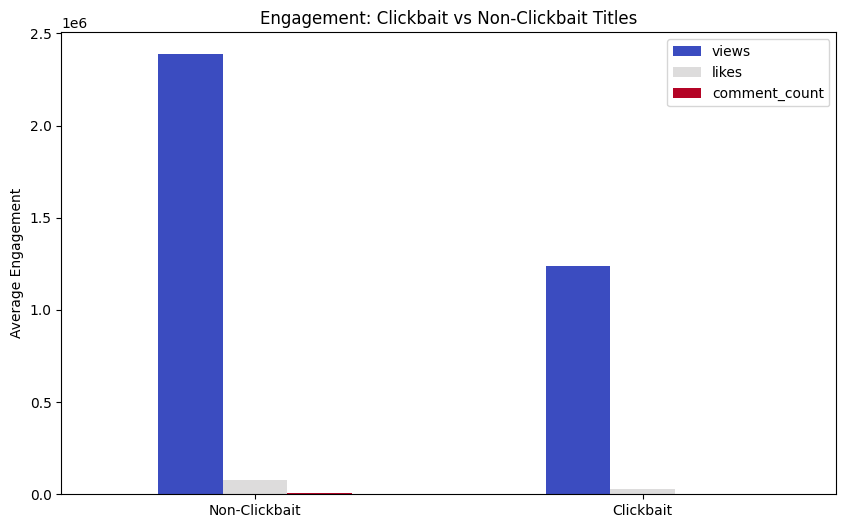

In [49]:
# Define a list of clickbait keywords
clickbait_keywords = ['you won’t believe', 'shocking', 'top 10', 'amazing', 'epic',
                      'crazy', 'what happened', 'this is why', 'insane', 'unbelievable']

#We Create a binary column: 1 if title contains clickbait words, else 0
df['clickbait_title'] = df['title'].str.lower().apply(
    lambda x: 1 if any(word in x for word in clickbait_keywords) else 0
)

#Then we Compare engagement
clickbait_engagement = df.groupby('clickbait_title')[['views', 'likes', 'comment_count']].mean()
clickbait_engagement.index = ['Non-Clickbait', 'Clickbait']

clickbait_engagement.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Engagement: Clickbait vs Non-Clickbait Titles')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.show()


Videos with no clickbait words had more engagement than videos with clickbait. This is probably due to general perspective of misleading content and spam associated with clickbait

**Conclusion**

From the results of the data analysis of US trending videos in terms of content engagement patterns and user interaction:


Clickbait’s do not boost user content engagement.
Even though most videos accumulate millions views quickly, we cannot use views alone to assess audience engagement. Engagement ratios can be used such as like-to-views ratio, comments to views in order to gain more insights generally for audience content interactions

. In terms of timing, we uncovered important patterns, videos posted in the afternoon and evenings are more likely to trend as well as videos posted on Thursdays and Fridays, very important for time awareness of promoters for content visibility target schedule. Click baits are more likely lower the videos engagement metrics on YouTube, very important for content creators and promoters to have in mind while uploading their videos, probably an out of time strategy.


This analysis highlights the broader complexity between audience behavior, content type and timing, which are very important for creators and marketers on social media platforms.


Therefore, we can finally get to learn that music and entertainment are the most appreciated content genre. Categories such as music, gaming and entertainment ware the top trending content on YouTube, probably due to broader audience preference or frequent uploads.


 Creators can priorities the entertainment content videos to gain more engagement. Promoters and advertisement industry can invest on the music and entertainment to gain market visibility.


If videos were posted in March, May and August, they are more likely to trend, highlighting the seasonality of the trending content in the US on YouTube. In terms of seasonal optimization, March, August and May are the best for time strategy for promoters and creators to optimize traffic and visibility.


